In [169]:
import pandas, glob, os
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np

In [203]:
def convert_timestamp(data, index):
    return datetime.fromtimestamp(data['Time(secs)'][index]).strftime("%A, %B %d, %Y %I:%M:%S")

def get_minimum_temperature(data, plate="MC plate RuOx", tmin_readable=True):
    y = data[f'{plate} T(K)']
    exclude_zeros = (y > 0)
    xmin = np.argmin(y[exclude_zeros])
    if tmin_readable:
        tmin = datetime.fromtimestamp(data['Time(secs)'][exclude_zeros][xmin]).strftime("%B %d, %Y")# %I:%M:%S")
    else:
        tmin = datetime.fromtimestamp(data['Time(secs)'][exclude_zeros][xmin])
    return tmin, y[exclude_zeros][xmin]

# Prerequisites 

This notebook can parse through converted Vericold log files to show historical trends in temperatures, pressures, etc. To run the cells below, first make sure that the `.vcl` files do not contain spaces in the filename. If they do, simply fire up a terminal and run 

```sh rename.sh```

in the directory that contains the log files. This will remove all spaces and replace them with underscores. Next, you need to convert the proprietary `.vcl` file format to readable ascii, which can be done with the following command: 

```sh log2ascii.sh``` 

in the same folder that contains the `.vcl` files. This bash script will loop over the available vcl files and convert them to comma separated values format. You are good to go now.

These scripts were built on top of the code from this thesis: 
https://etheses.whiterose.ac.uk/2786/1/uk_bl_ethos_509042.pdf

# Load available files

In [172]:
# Adjust this to the path that contains your csv files
log_path = r"/Users/gkoolstra/Documents/LogFileConverter"
files = np.sort(glob.glob(os.path.join(log_path, "*.csv")))
print(f"Found {len(files)}, here are the first few:")
print(files[:5])

# The following header works for Vericold in QNL but may have to be adjusted for Oxicold or Snowflake.
# You can find the header in the vcl file, when you open it with a text editor.
header = ["LineSize(bytes)", "LineNumber", "Time(secs)", 
          "PressureM1Condense(Bar)", 
          "PressureM3Tank(Bar)", 
          "PressureM21Still(mBar)", 
          "PressureM22Forepump(mBar)", 
          "PressureMDewar(mBar)", 
          "PressureFPSafety(Bar)", 
          "4K PT t(s)", "4K PT T(K)", "4K PT R(Ohm)", 
          "4K plate t(s)", "4K plate T(K)", "4K plate R(Ohm)", 
          "Still t(s)", "Still T(K)", "Still R(Ohm)", 
          "MC plate cernox t(s)", "MC plate cernox T(K)", "MC plate cernox R(Ohm)", 
          "MC plate RuOx t(s)", "MC plate RuOx T(K)", "MC plate RuOx R(Ohm)", 
          "MC internal RuOx t(s)", "MC internal RuOx T(K)", "MC internal RuOx R(Ohm)", 
          "chan[7] t(s)", "chan[7] T(K)", "chan[7] R(Ohm)", 
          "chan[8] t(s)", "chan[8] T(K)", "chan[8] R(Ohm)", 
          "70K PT t(s)", "70K PT T(K)", "70K PT R(Ohm)", 
          "70K plate t(s)", "70K plate T(K)", "70K plate R(Ohm)", 
          "Heated Load RuOx t(s)", "Heated Load RuOx T(K)", "Heated Load RuOx R(Ohm)", 
          "chan[11] t(s)", "chan[11] T(K)", "chan[11] R(Ohm)", 
          "chan[12] t(s)", "chan[12] T(K)", "chan[12] R(Ohm)", 
          "chan[13] t(s)", "chan[13] T(K)", "chan[13] R(Ohm)", 
          "chan[14] t(s)", "chan[14] T(K)", "chan[14] R(Ohm)",
          "chan[15] t(s)", "chan[15] T(K)", "chan[15] R(Ohm)", 
          "Still heater (W)", 
          "chamber heater (W)", 
          "IVC sorb heater (W)"]

Found 15, here are the first few:
['/Users/gkoolstra/Documents/LogFileConverter/log_201207_150641.csv'
 '/Users/gkoolstra/Documents/LogFileConverter/log_210111_171203.csv'
 '/Users/gkoolstra/Documents/LogFileConverter/log_210126_132631.csv'
 '/Users/gkoolstra/Documents/LogFileConverter/log_210423_131643.csv'
 '/Users/gkoolstra/Documents/LogFileConverter/log_210520_090928.csv']


# Load a sample log

In [209]:
# Use pandas to load the second file in the list
file = files[1]
print(file)

data = pandas.read_csv(file, names=header, index_col=False)

print(f"Time axis starts at {convert_timestamp(data, 0)}")
print(f"and ends at {convert_timestamp(data, data.shape[0]-1)}")

/Users/gkoolstra/Documents/LogFileConverter/log_210111_171203.csv
Time axis starts at Monday, January 11, 2021 04:06:40
and ends at Tuesday, January 26, 2021 02:26:40


Take a look at the file structure and make sure the headers are correct. 

In [174]:
data

,LineSize(bytes),LineNumber,Time(secs),PressureM1Condense(Bar),PressureM3Tank(Bar),PressureM21Still(mBar),PressureM22Forepump(mBar),PressureMDewar(mBar),PressureFPSafety(Bar),4K PT t(s),...,chan[13] R(Ohm),chan[14] t(s),chan[14] T(K),chan[14] R(Ohm),chan[15] t(s),chan[15] T(K),chan[15] R(Ohm),Still heater (W),chamber heater (W),IVC sorb heater (W)
0,480,0,1.610410e+09,0.827662,0.002344,0.2220,7.2600,9.870000e-07,0.860378,0,...,0,0,0,0,0,0,0,0.001800,0,0
1,480,1,1.610410e+09,0.822779,0.002344,0.2220,7.2900,9.840000e-07,0.859597,0,...,0,0,0,0,0,0,0,0.001800,0,0
2,480,2,1.610410e+09,0.822779,0.002344,0.2240,7.3100,9.800000e-07,0.859206,0,...,0,0,0,0,0,0,0,0.001800,0,0
3,480,3,1.610410e+09,0.827662,0.002344,0.2210,7.3000,9.820000e-07,0.859206,0,...,0,0,0,0,0,0,0,0.001800,0,0
4,480,4,1.610410e+09,0.822779,0.002344,0.2200,7.3200,9.840000e-07,0.859206,0,...,0,0,0,0,0,0,0,0.001800,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42875,480,42875,1.611700e+09,0.957060,0.493863,0.0771,0.0709,5.720000e-02,0.071877,0,...,0,0,0,0,0,0,0,0.001901,0,0
42876,480,42876,1.611700e+09,0.957060,0.493863,0.0772,0.0709,5.610000e-02,0.071877,0,...,0,0,0,0,0,0,0,0.001901,0,0
42877,480,42877,1.611700e+09,0.957060,0.493472,0.0772,0.0709,5.490000e-02,0.071877,0,...,0,0,0,0,0,0,0,0.001901,0,0
42878,480,42878,1.611700e+09,0.957060,0.493863,0.0772,0.0709,5.390000e-02,0.072659,0,...,0,0,0,0,0,0,0,0.001901,0,0


## Plot temperatures for the cooldown 

Here we can take a look at the temperature vs. time for a single cooldown. We use the data file that we loaded in the previous section. 

<IPython.core.display.Javascript object>


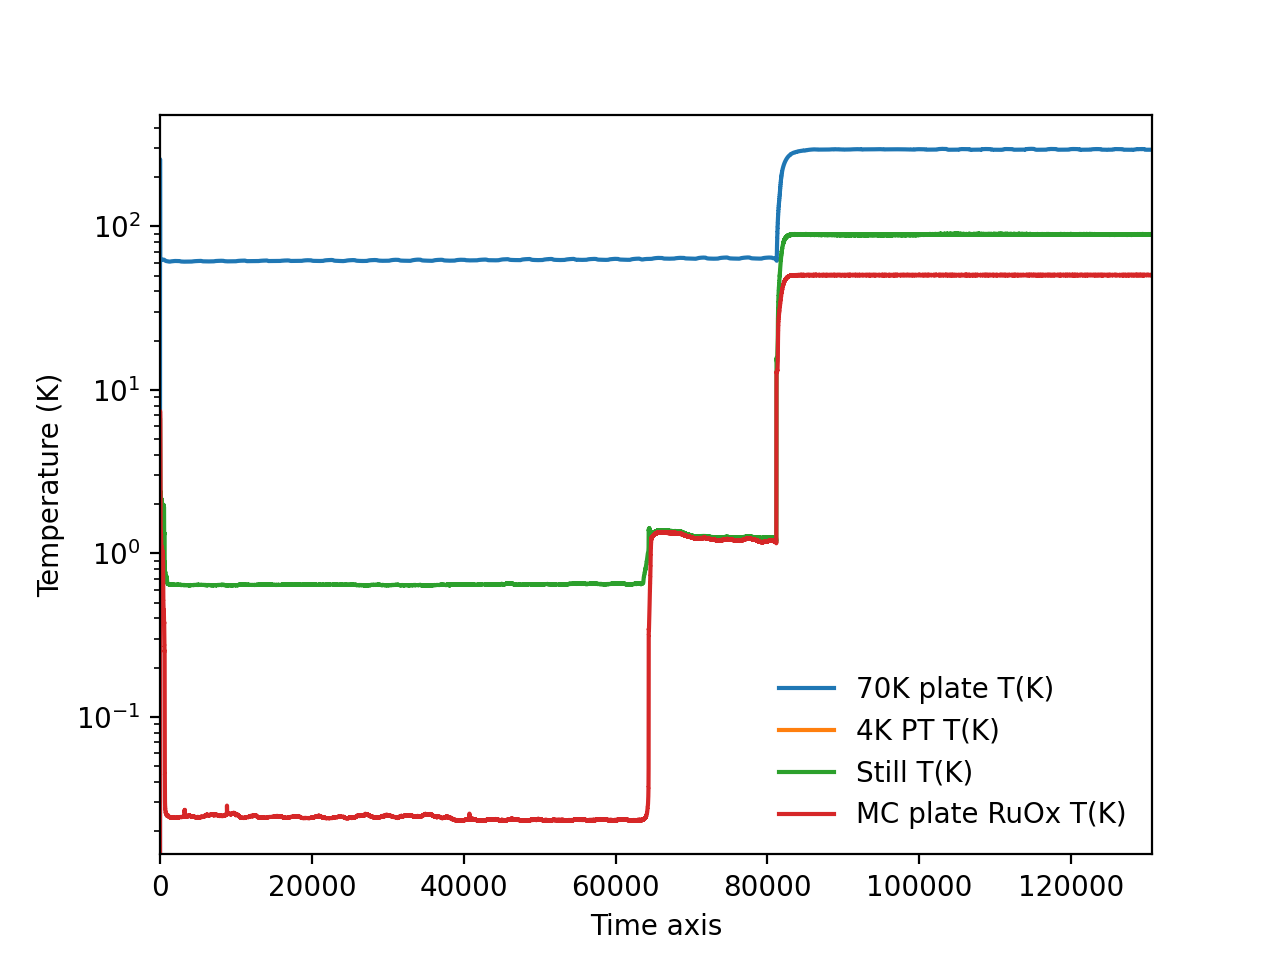

(0.0, 130665.0)

In [212]:
%matplotlib notebook

xaxis = data['LineNumber']

plt.figure()
labels = ['70K plate T(K)', '4K PT T(K)', "Still T(K)", 'MC plate RuOx T(K)']
for label in labels:
    plt.plot(xaxis, data[label], label=label)
    
plt.yscale('log')
plt.legend(loc=0, frameon=False)
plt.ylabel("Temperature (K)")
plt.xlabel("Time axis")
plt.xlim(np.min(xaxis), np.max(xaxis))

## Pressure graph

<IPython.core.display.Javascript object>


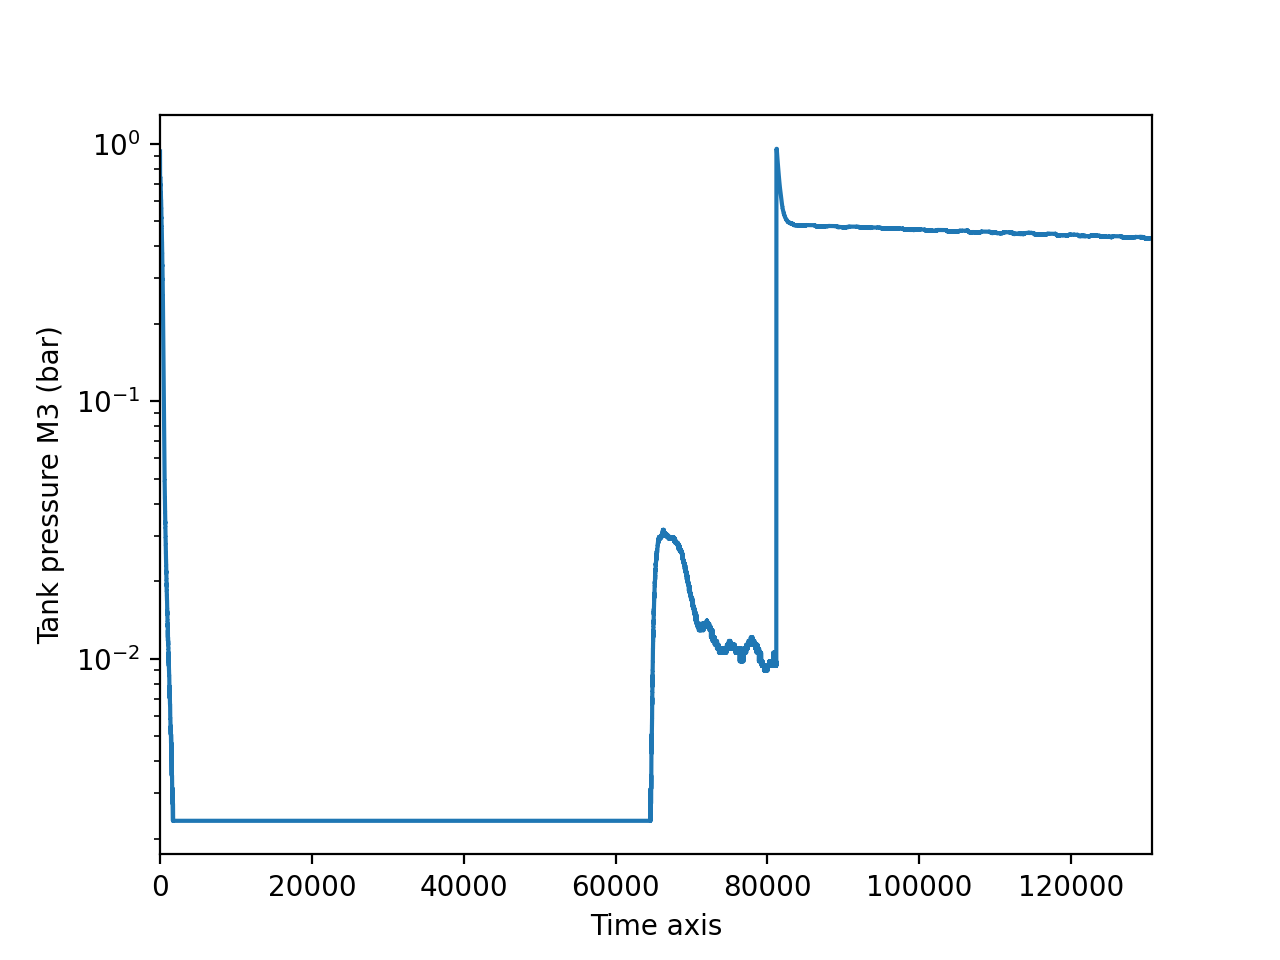

(0.0, 130665.0)

In [213]:
plt.figure()
plt.plot(xaxis, data['PressureM3Tank(Bar)'])
plt.yscale('log')
plt.ylabel("Tank pressure M3 (bar)")
plt.xlabel("Time axis")
plt.xlim(np.min(xaxis), np.max(xaxis))

If you're interested in the minimum temperature during this cooldown for a specific plate, you can use `get_minimum_temperature` and specify the desired thermometer.

In [214]:
print(get_minimum_temperature(data, plate="70K plate"))
print(get_minimum_temperature(data, plate="4K plate"))
print(get_minimum_temperature(data, plate="Still"))
print(get_minimum_temperature(data, plate="MC plate RuOx"))

('October 06, 2021', 60.814)
('October 05, 2021', 2.65161)
('October 18, 2021', 0.634112)
('October 26, 2021', 0.0231722)


# Plot historical trends for many cooldowns

In [210]:
tmins, Tmins, T4ks = list(), list(), list()
max_tank_pressure = list()
min_dewar_pressure = list()

# Loop over all indexed files
for file in files:
    data = pandas.read_csv(file, names=header, index_col=False)
    tmin, Tmin_mc = get_minimum_temperature(data, plate="MC plate RuOx", tmin_readable=False)
    print(f"Tmin = {Tmin_mc} K at {tmin}")
    _, Tmin_4k = get_minimum_temperature(data, plate="4K plate")
    
    max_tank_pressure.append(np.max(data['PressureM3Tank(Bar)']))
    min_dewar_pressure.append(np.min(data['PressureMDewar(mBar)']))
    tmins.append(tmin)
    Tmins.append(Tmin_mc)
    T4ks.append(Tmin_4k)

Tmin = 0.0228003 K at 2020-12-27 20:33:20
Tmin = 0.0229539 K at 2021-01-12 19:53:20
Tmin = 0.0229906 K at 2021-02-06 17:06:40
Tmin = 0.0234427 K at 2021-04-24 03:26:40
Tmin = 0.0247117 K at 2021-05-20 15:33:20
Tmin = 48.8766 K at 2021-06-10 14:20:00
Tmin = 0.0227612 K at 2021-06-24 00:33:20
Tmin = 0.0227379 K at 2021-06-29 22:13:20
Tmin = 0.0232278 K at 2021-07-15 16:00:00
Tmin = 0.0232331 K at 2021-07-15 21:33:20
Tmin = 0.023238 K at 2021-07-27 14:06:40
Tmin = 0.0229471 K at 2021-08-06 10:13:20
Tmin = 50.2409 K at 2021-09-10 17:26:40
Tmin = 0.0229171 K at 2021-09-19 04:13:20
Tmin = 0.0231722 K at 2021-10-26 19:00:00


<IPython.core.display.Javascript object>


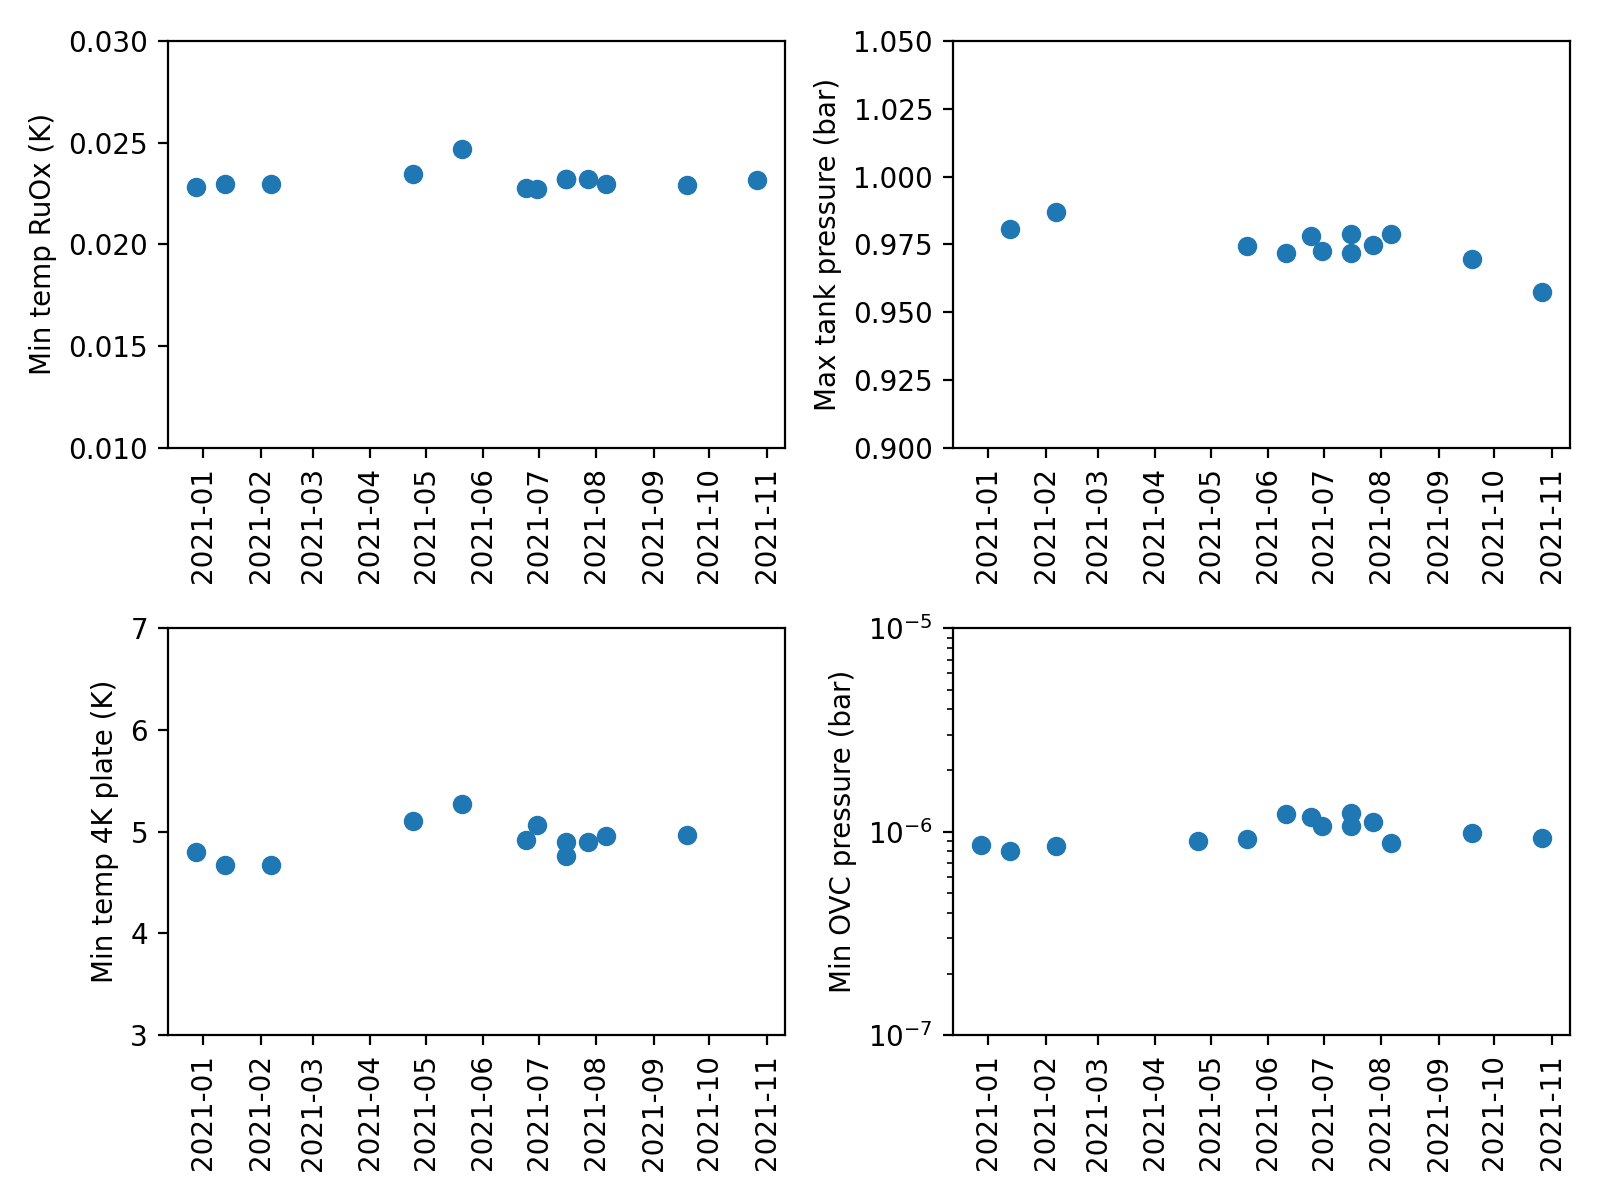

In [208]:
plt.figure(figsize=(8., 6.))
plt.subplot(2, 2, 1)
plt.plot(tmins, Tmins, 'o')
plt.ylabel("Min temp RuOx (K)")
plt.ylim(0.01, 0.03)
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.plot(tmins, max_tank_pressure, 'o')
plt.ylabel("Max tank pressure (bar)")
plt.ylim(0.9, 1.05)
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.plot(tmins, T4ks, 'o')
plt.ylim(3, 7)
plt.ylabel("Min temp 4K plate (K)")
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
plt.plot(tmins, min_dewar_pressure, 'o')
plt.yscale('log')
plt.ylabel("Min OVC pressure (bar)")
plt.xticks(rotation=90)
plt.ylim(1e-7, 1e-5)

plt.tight_layout()